# AIPI 590 - XAI | Assignment #09




In this assignment, I’m using a Code Tutorial to explain Logistic Regression and a Blog to explain LIME. The tutorial provides a step-by-step guide for implementing Linear Regression, while the blog simplifies LIME’s purpose and application for a general audience, showing how AI decisions can be made more transparent. For the assignment, I used the previous assignment 6 and ChatGPT as guidance.

Shunxin Zhang

Notebook:https://colab.research.google.com/github/zsx711/AIPI-590/blob/main/notebook/AIPI_590_Assignment10.ipynb [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zsx711/AIPI-590/blob/main/notebook/AIPI_590_Assignment10.ipynb)

# Logistic Regression Code Tutorial
In the tutorial, we will use Logistic Regression to classify different types of wine based on their chemical properties. We'll walk through the entire process: loading the dataset, training the model, and evaluating its performance.

**Step 1: Import Libraries**


*   numpy and pandas: Data manipulation.
*   sklearn: Provides dataset, model, and evaluation functions.
*   matplotlib.pyplot: For plotting results.

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

**Step 2: Load and Explore the Dataset**


Wine dataset contains:
*   Features: Chemical properties of different wines.
*   Target: Types of wine (0, 1, 2).

In [5]:
wine = load_wine()
X, y = wine.data, wine.target

print(f"Feature names: {wine.feature_names}")
print(f"Target names: {wine.target_names}")


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']


**Step 3: Split the Dataset**

*   Training set (80%): Used to train the model.
*   Testing set (20%): Used to evaluate the model’s performance.
*   random_state=42 ensures reproducibility of results.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 4: Train the Logistic Regression Model**

*   max_iter=1000 ensures enough iterations for the model to converge.


In [7]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

**Step 5: Make Predictions and Evaluate the Model**

*   Use the trained model to predict wine types on the test set.
*   Accuracy Score: Measures the percentage of correct predictions.


In [8]:
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')


Logistic Regression Accuracy: 0.97


**Step 7: Visualize Actual vs. Predicted Labels**
*   Scatterplot: Compares actual wine types (blue) with predicted wine types (red).


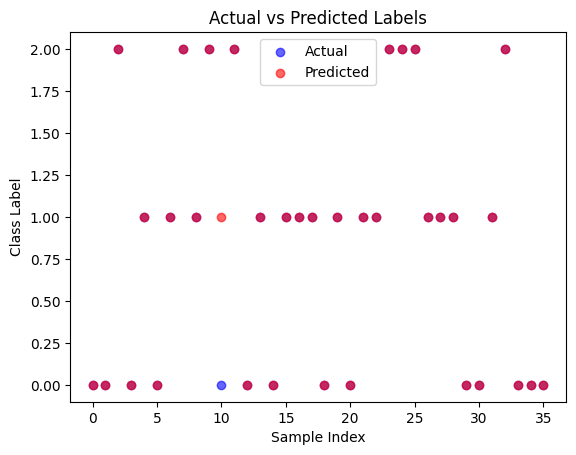

In [9]:
plt.scatter(range(len(y_test)), y_test, label="Actual", color="blue", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", color="red", alpha=0.6)
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Actual vs Predicted Labels')
plt.show()


# Blog Explaination - LIME: Making AI Decisions Understandable for Everyone


### Introduction

Imagine you’re applying for a job, and you don’t even make it to the interview stage. You find out the company used an AI system to screen resumes. You’re left wondering, What did the AI see in my application that got me rejected? This is where LIME steps in. LIME can help explain exactly why the AI made that decision, giving you insights you wouldn’t otherwise have.

### What is LIME?
LIME stands for Local Interpretable Model-agnostic Explanations. It’s a tool designed to explain how complex AI models make individual decisions. Whether it’s filtering resumes or approving loans, LIME helps you understand what factors influenced a specific outcome.

### How Does LIME Work?
1. Select a Decision: LIME focuses on one prediction, like why your resume didn’t pass the screening.

2. Generate Similar Data Points: It creates slight variations of your resume (e.g., tweaking your skills or experience) to see how the AI reacts.
3. Fit a Simple Model Locally: LIME builds a simple, easy-to-understand model around your specific case to mimic the AI’s behavior.
4. Highlight Key Features: Finally, it shows which aspects of your resume had the most impact—whether it was your education, work experience, or keywords.


### Example: Resume Screening
Let’s say you submitted a resume, and the AI rejected it. LIME might break down the decision like this:

Relevant work experience: +50%

*   Relevant work experience: +50%
*   Education level: +20%
*   Lack of key skills: -30%
*   Missing keywords: -40%

### Why Should We Care?


*   Job Seekers: Understand why your application was rejected and learn how to improve it.
*   Companies: Build trust by showing candidates how AI systems make hiring decisions.
*   Everyone Else: LIME promotes fairness by revealing biases or flaws in AI models.



### Conclusion
At the end of the day, AI is making decisions that can impact our lives in big ways—whether it’s landing a job, getting a loan, or even finding your next favorite song. But let’s be real, it’s frustrating when those decisions feel like they’re coming from a black box with no explanation. That’s why LIME is such a game-changer. It’s like having a backstage pass to see how the AI really works. With LIME, you’re not just left wondering—you get answers you can actually use. So next time you face an AI-driven decision, wouldn’t it be nice to say, I know exactly why that happened?